In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [5]:
np.random.seed(42)

# Function for creating datapoints in the form of a circle
def PointsInCircum(r,n=100):
    return [(math.cos(2*math.pi/n*x)*r+np.random.normal(-30,30),math.sin(2*math.pi/n*x)*r+np.random.normal(-30,30)) for x in range(1,n+1)]

In [6]:
# Creating data points in the form of a circle
df=pd.DataFrame(PointsInCircum(500,1000))
df=df.append(PointsInCircum(300,700))
df=df.append(PointsInCircum(100,300))

# Adding noise to the dataset
df=df.append([(np.random.randint(-600,600),np.random.randint(-600,600)) for i in range(300)])

C:\Users\ss\AppData\Local\Temp\ipykernel_5336\4162933600.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(PointsInCircum(300,700))
C:\Users\ss\AppData\Local\Temp\ipykernel_5336\4162933600.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(PointsInCircum(100,300))
C:\Users\ss\AppData\Local\Temp\ipykernel_5336\4162933600.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append([(np.random.randint(-600,600),np.random.randint(-600,600)) for i in range(300)])


In [7]:
df.head()

,0,1
0,484.891555,-31.006357
1,489.391178,21.973916
2,462.886575,-27.599889
3,517.218479,5.588090
4,455.669049,1.982181


In [8]:
df.shape

(2300, 2)

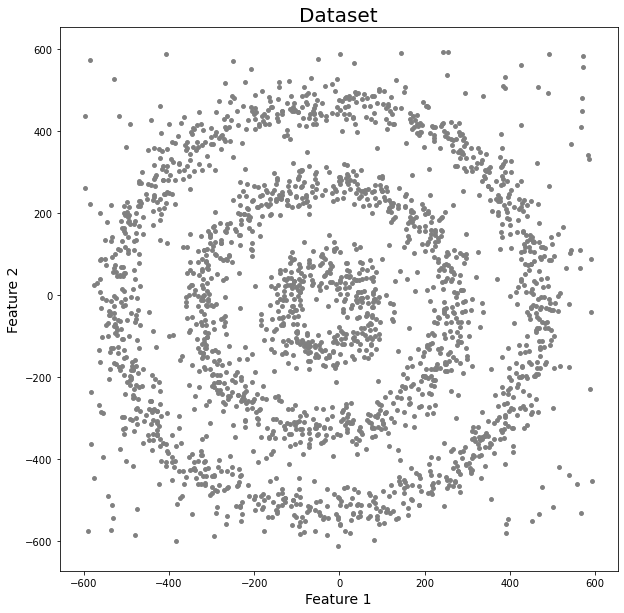

In [9]:
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],s=15,color='grey')
plt.title('Dataset',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

# K-Means vs. Hierarchical vs. DBSCAN Clustering

In [10]:
#1. K-Means
#We’ll first start with K-Means because it is the easiest clustering algorithm

from sklearn.cluster import KMeans
k_means=KMeans(n_clusters=4,random_state=42)
k_means.fit(df[[0,1]])

KMeans(n_clusters=4, random_state=42)

In [11]:
df['KMeans_labels']=k_means.labels_

In [12]:
df.head()

,0,1,KMeans_labels
0,484.891555,-31.006357,3
1,489.391178,21.973916,3
2,462.886575,-27.599889,3
3,517.218479,5.588090,3
4,455.669049,1.982181,3


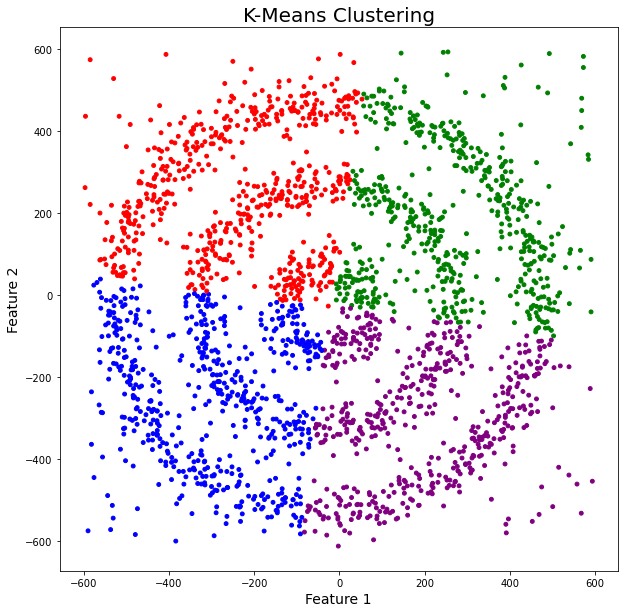

In [14]:
import matplotlib
# Plotting resulting clusters
colors=['purple','red','blue','green']
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],c=df['KMeans_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('K-Means Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

In [15]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean')
model.fit(df[[0,1]])

AgglomerativeClustering(n_clusters=4)

In [16]:
df['HR_labels']=model.labels_


In [17]:
df.head()

,0,1,KMeans_labels,HR_labels
0,484.891555,-31.006357,3,1
1,489.391178,21.973916,3,2
2,462.886575,-27.599889,3,1
3,517.218479,5.588090,3,1
4,455.669049,1.982181,3,2


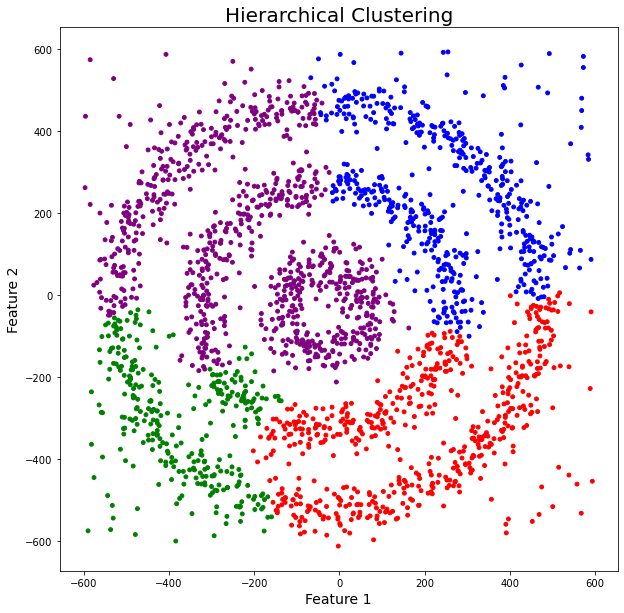

In [18]:

# Plotting resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],c=df['HR_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('Hierarchical Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

In [19]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN()
dbscan.fit(df[[0,1]])

DBSCAN()

In [20]:
df['DBSCAN_labels']=dbscan.labels_

In [21]:
df.head()

,0,1,KMeans_labels,HR_labels,DBSCAN_labels
0,484.891555,-31.006357,3,1,-1
1,489.391178,21.973916,3,2,-1
2,462.886575,-27.599889,3,1,-1
3,517.218479,5.588090,3,1,-1
4,455.669049,1.982181,3,2,-1


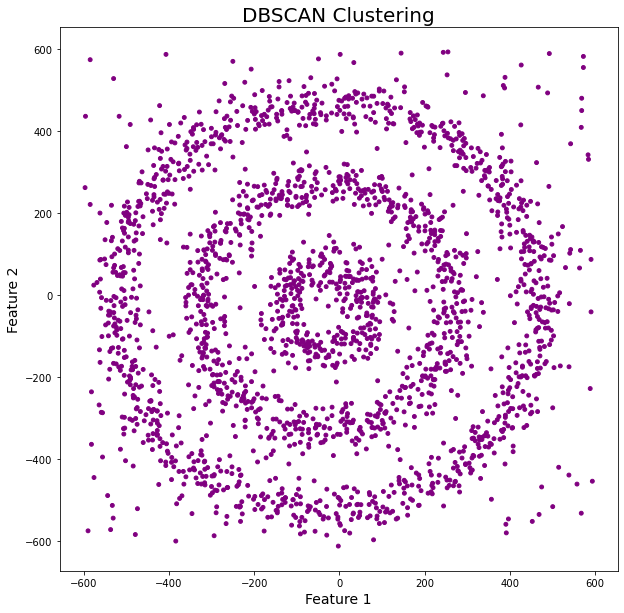

In [22]:
# Plotting resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],c=df['DBSCAN_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

In [23]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df[[0,1]])
distances, indices = nbrs.kneighbors(df[[0,1]])

In [24]:
distances

array([[ 0.        ,  6.91861074],
       [ 0.        , 10.80836526],
       [ 0.        ,  7.56030267],
       ...,
       [ 0.        , 25.77071121],
       [ 0.        , 23.34523506],
       [ 0.        , 37.73592453]])

In [25]:
indices

array([[   0,  993],
       [   1, 2237],
       [   2,    5],
       ...,
       [2297,  210],
       [2298, 2139],
       [2299, 2059]], dtype=int64)

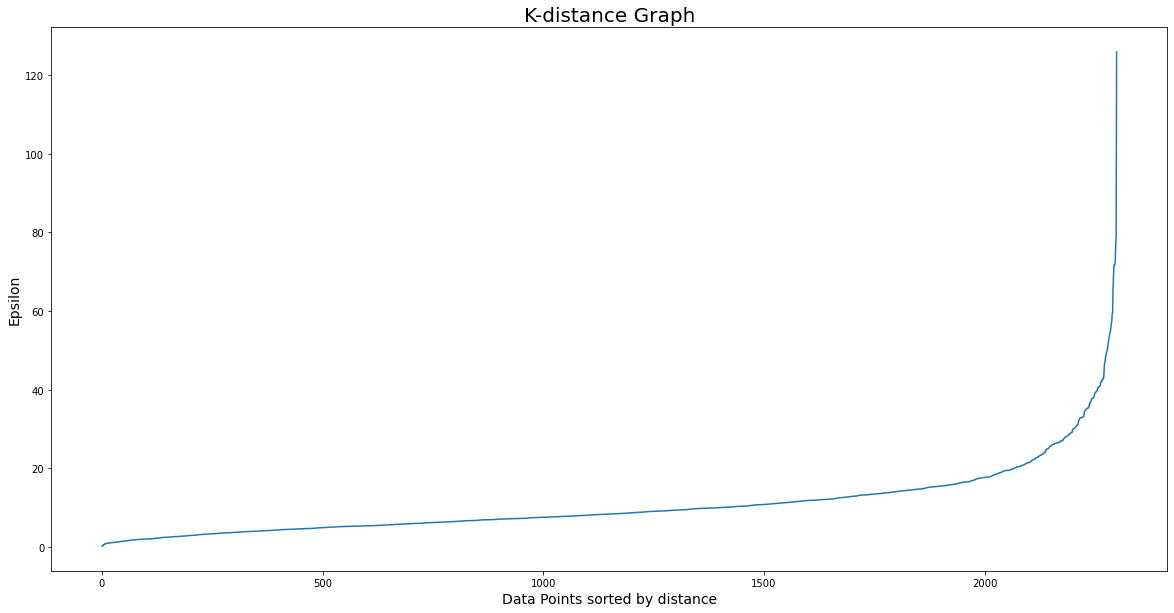

In [26]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [27]:
#df.head()

,0,1,KMeans_labels,HR_labels,DBSCAN_labels
0,484.891555,-31.006357,3,1,-1
1,489.391178,21.973916,3,2,-1
2,462.886575,-27.599889,3,1,-1
3,517.218479,5.588090,3,1,-1
4,455.669049,1.982181,3,2,-1


In [28]:
from sklearn.cluster import DBSCAN
dbscan_opt=DBSCAN(eps=30,min_samples=6)
dbscan_opt.fit(df[[0,1]])

DBSCAN(eps=30, min_samples=6)

In [29]:
df['DBSCAN_opt_labels']=dbscan_opt.labels_


In [30]:
df.head()

,0,1,KMeans_labels,HR_labels,DBSCAN_labels,DBSCAN_opt_labels
0,484.891555,-31.006357,3,1,-1,0
1,489.391178,21.973916,3,2,-1,0
2,462.886575,-27.599889,3,1,-1,0
3,517.218479,5.588090,3,1,-1,0
4,455.669049,1.982181,3,2,-1,0


In [31]:
df['DBSCAN_opt_labels'].value_counts()

 0    1030
 1     730
 2     318
-1     222
Name: DBSCAN_opt_labels, dtype: int64

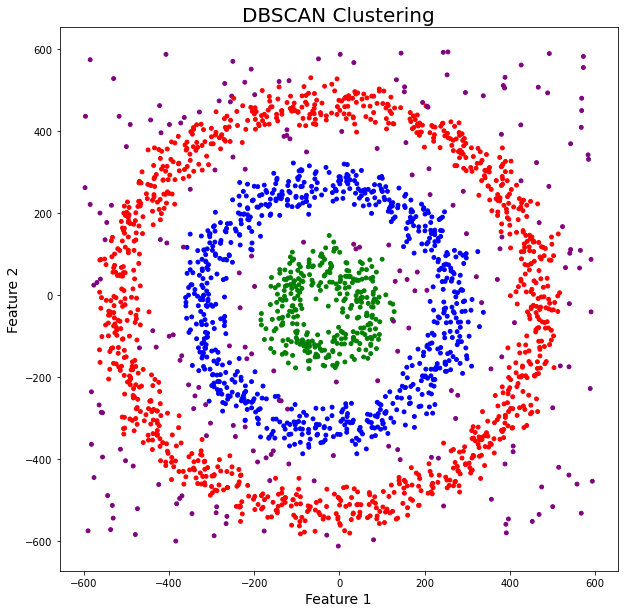

In [32]:
# Plotting the resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],c=df['DBSCAN_opt_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()